In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'weather/weather.csv', index_col=0)

In [4]:
etth1.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [5]:
etth1.shape

(52696, 21)

In [6]:
etth1.loc[etth1['OT'] < 350] = etth1['OT'].mean()

<Axes: xlabel='date'>

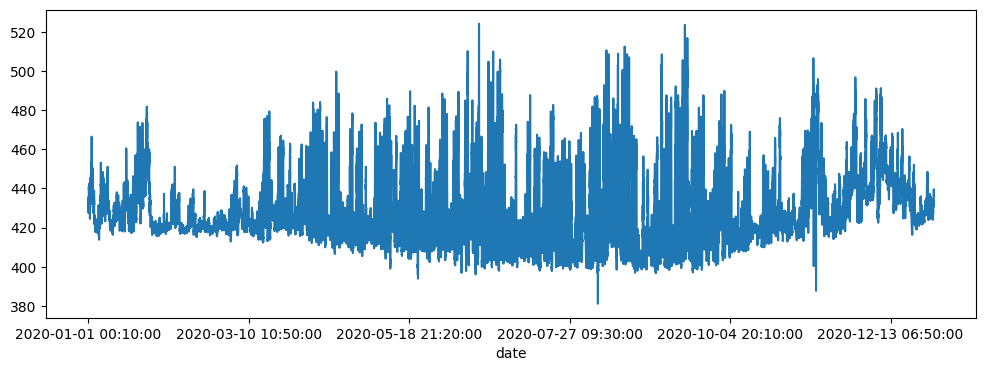

In [7]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [8]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

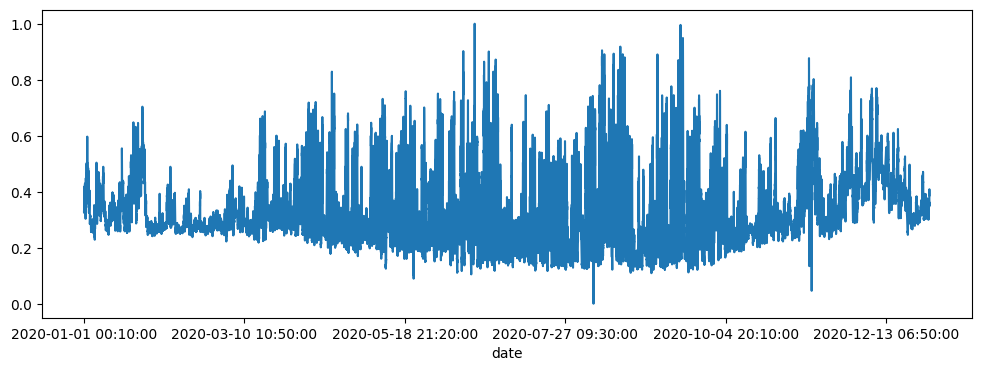

In [9]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [10]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1825667597
Epoch 2, Boundaries delta: 0.0727202580, Codewords delta: 0.0490585607
Epoch 3, Boundaries delta: 0.0457853786, Codewords delta: 0.0345005189
Epoch 4, Boundaries delta: 0.0315255405, Codewords delta: 0.0256337735
Epoch 5, Boundaries delta: 0.0232548708, Codewords delta: 0.0197559329
Epoch 6, Boundaries delta: 0.0176794653, Codewords delta: 0.0155827386
Epoch 7, Boundaries delta: 0.0138225850, Codewords delta: 0.0124015205
Epoch 8, Boundaries delta: 0.0109839240, Codewords delta: 0.0098943033
Epoch 9, Boundaries delta: 0.0088863591, Codewords delta: 0.0080190903
Epoch 10, Boundaries delta: 0.0072509205, Codewords delta: 0.0066903980
Epoch 11, Boundaries delta: 0.0061863484, Codewords delta: 0.0057372873
Epoch 12, Boundaries delta: 0.0055031618, Codewords delta: 0.0050472736
Epoch 13, Boundaries delta: 0.0049358930, Codewords delta: 0.0045195649
Epoch 14, Boundaries delta: 0.0044577695, Codewords delta: 0.0041428594
E

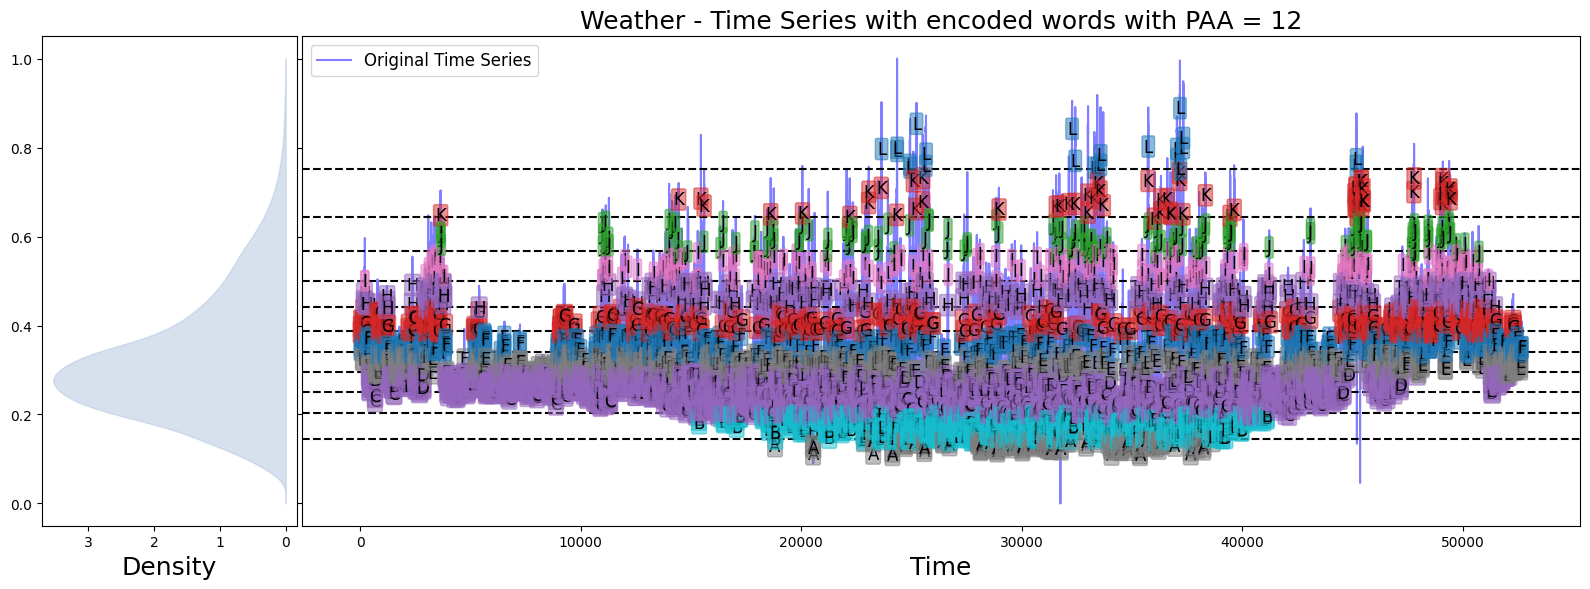

In [34]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=12)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="weather/weather_ksax.png", data_name='Weather')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"weather/weather_ksax.csv")

### Stationary

In [11]:
target = scaled_etth1
target = target.diff().dropna()

In [12]:
target.head()

date
2020-01-01 00:20:00   -0.000699
2020-01-01 00:30:00   -0.002795
2020-01-01 00:40:00    0.016771
2020-01-01 00:50:00    0.015374
2020-01-01 01:00:00   -0.011880
dtype: float64

<Axes: xlabel='date'>

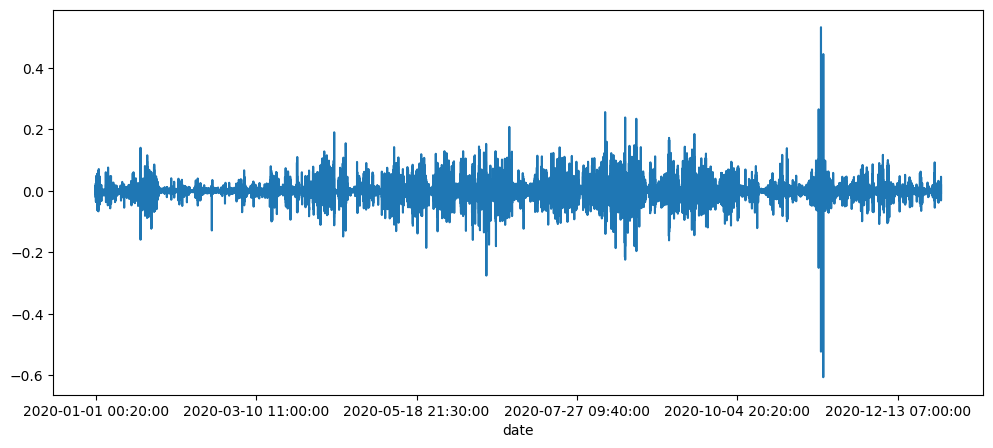

In [13]:
plt.figure(figsize=(12,5))
target.plot()

Epoch 1, Boundaries delta: 0.2201892928, Codewords delta: 0.2464007926
Epoch 2, Boundaries delta: 0.0981580129, Codewords delta: 0.0478938965
Epoch 3, Boundaries delta: 0.0492156670, Codewords delta: 0.0270500587
Epoch 4, Boundaries delta: 0.0274753124, Codewords delta: 0.0157357237
Epoch 5, Boundaries delta: 0.0158407186, Codewords delta: 0.0103405526
Epoch 6, Boundaries delta: 0.0102196074, Codewords delta: 0.0077929329
Epoch 7, Boundaries delta: 0.0072338000, Codewords delta: 0.0060662270
Epoch 8, Boundaries delta: 0.0054910886, Codewords delta: 0.0047640182
Epoch 9, Boundaries delta: 0.0043418062, Codewords delta: 0.0037924994
Epoch 10, Boundaries delta: 0.0034776495, Codewords delta: 0.0030672964
Epoch 11, Boundaries delta: 0.0028178721, Codewords delta: 0.0025932580
Epoch 12, Boundaries delta: 0.0023470299, Codewords delta: 0.0022355595
Epoch 13, Boundaries delta: 0.0020808268, Codewords delta: 0.0019866481
Epoch 14, Boundaries delta: 0.0018782431, Codewords delta: 0.0017802857
E

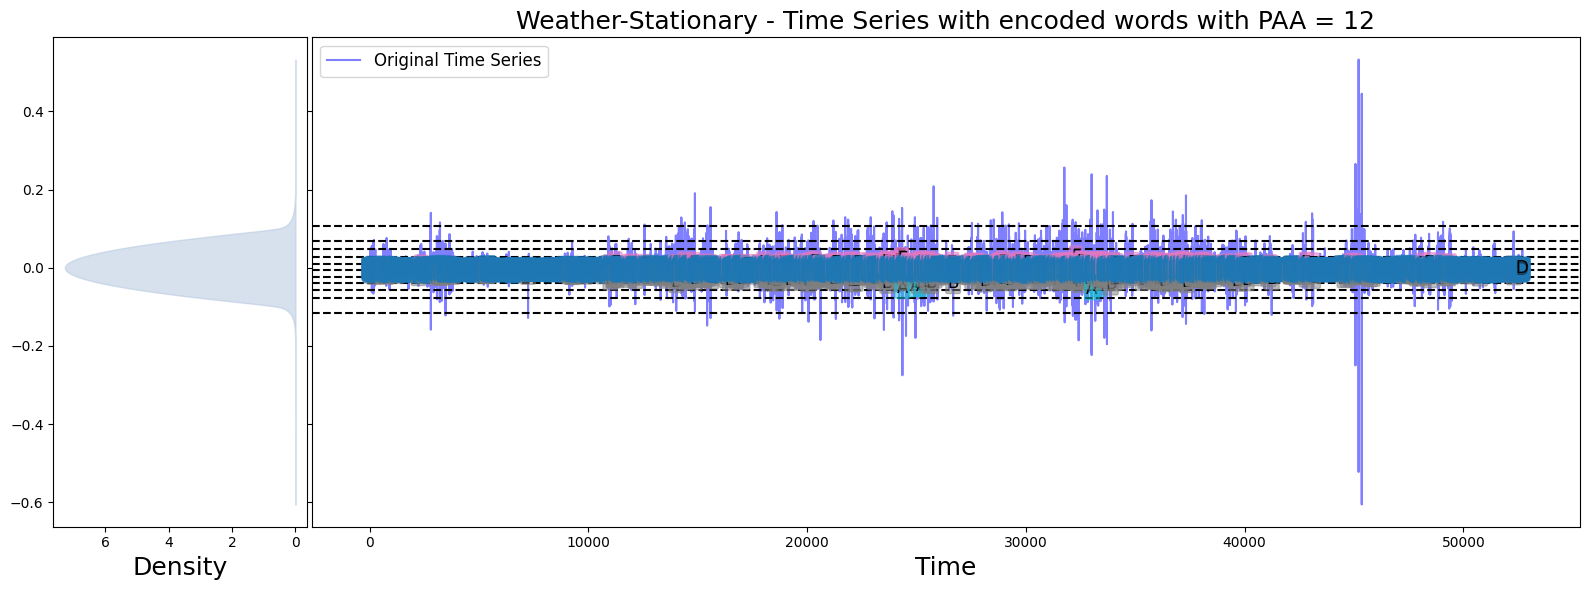

In [14]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=12)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="weather/weather_stationary_ksax.png", data_name='Weather-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"weather/weather_stationary_ksax.csv")